In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ~資料匯入~

### 輸出範例

In [2]:
common_path = "../MachineLearning_titanic/dataset/"
dfGender = pd.read_csv(common_path + "gender_submission.csv",encoding = "big5")
dfGender.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

### 訓練資料

In [3]:
dfTrain = pd.read_csv(common_path + "train.csv",encoding = "big5")
dfTrain.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

### 測試資料

In [4]:
dfTest = pd.read_csv(common_path + "test.csv",encoding = "big5")
dfTest.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S


## ~資料預處理~

### 查看各欄遺漏值總數

In [5]:
print("Train遺漏值總數\n", dfTrain.isnull().sum())
print("\nTest遺漏值總數\n", dfTest.isnull().sum())

Train遺漏值總數
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test遺漏值總數
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### 均值填補「年齡」

In [6]:
agemean_Train = int(dfTrain.Age.mean())
print("平均年齡：", agemean_Train)
dfTrain.Age[dfTrain['Age'].isnull()] = agemean_Train
dfTrain.head(10)

agemean_Test = int(dfTest.Age.mean())
print("平均年齡：", agemean_Test)
dfTest.Age[dfTest['Age'].isnull()] = agemean_Test
dfTest.head(10)

平均年齡： 29
平均年齡： 30


C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

### cabin(住的艙等)整欄刪除

In [7]:
dfTrain.drop('Cabin', axis=1, inplace=True)
dfTrain.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  29.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
5      0            330877   8.4583        Q  
6      0             17463  51.8625        S  
7      1            349909  21.0750        S  
8      2            347742  11.1333        S  
9      0            237736  30.0708        C

### Survived以文字表示
這是為了作為混淆矩陣的標籤而處理的，否則混淆矩陣那裡會出錯 <br/>
複製一欄以作為文字表示「存」或「歿」，並且替換成文字

In [8]:
dfTrain['SurvivedText'] = dfTrain['Survived'].copy()
dfTrain.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  29.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Embarked  SurvivedText  
0      0         A/5 21171   7.2500        S             0  
1      0          PC 17599  71.2833        C             1  
2      0  STON/O2. 3101282   7.9250        S             1  
3      0            113803  53.1000        S             1  
4      0            373450   8.0500        S             0  
5      0            330877   8.4583        Q             0  
6      0             17463  51.8625        S             0  
7      1            349909  21.0750        S             0  
8      2            347742  11.1333        S             1  
9      0            237736  30.0708        C             1

In [9]:
dfTrain['Survived'].replace({0:'Not Survived',1:'Survived'},inplace=True)
dfTrain.head(10)

PassengerId      Survived  Pclass  \
0            1  Not Survived       3   
1            2      Survived       1   
2            3      Survived       3   
3            4      Survived       1   
4            5  Not Survived       3   
5            6  Not Survived       3   
6            7  Not Survived       1   
7            8  Not Survived       3   
8            9      Survived       3   
9           10      Survived       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  29.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Embarked  SurvivedText  
0      0         A/5 21171   7.2500        S             0  
1      0          PC 17599  71.2833        C             1  
2      0  STON/O2. 3101282   7.9250        S             1  
3      0            113803  53.1000        S             1  
4      0            373450   8.0500        S             0  
5      0            330877   8.4583        Q             0  
6      0             17463  51.8625        S             0  
7      1            349909  21.0750        S             0  
8      2            347742  11.1333        S             1  
9      0            237736  30.0708        C             1

### 處理Embarked

In [10]:
#C = Cherbourg瑟堡（法國）, Q = Queenstown皇后鎮 (紐西蘭), S = Southampton南安普敦（英國）
dfTrain['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
dfTrain[dfTrain["Embarked"].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62  Survived       1                        Icard, Miss. Amelie   
829          830  Survived       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  SurvivedText  
61   female  38.0      0      0  113572  80.0      NaN             1  
829  female  62.0      0      0  113572  80.0      NaN             1

In [12]:
dfTrain.Embarked[dfTrain["Embarked"].isnull()] = 'S'

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## ~切分資料與演算~

In [122]:
#X = dfTrain[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Fare']]
X = dfTrain[['PassengerId', 'Age']]
y = dfTrain['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
print("X_train", X_train.head(10))
print("\nx_test", X_test.head(10))
print("\ny_train", y_train.head(10))
print("\ny_test", y_test.head(10))

X_train      PassengerId    Age
595          596  36.00
778          779  29.00
152          153  55.50
596          597  29.00
25            26  38.00
283          284  19.00
803          804   0.42
643          644  29.00
684          685  60.00
873          874  47.00

x_test      PassengerId   Age
402          403  21.0
434          435  50.0
822          823  38.0
221          222  27.0
562          563  28.0
473          474  23.0
137          138  37.0
194          195  44.0
35            36  42.0
593          594  29.0

y_train 595    Not Survived
778    Not Survived
152    Not Survived
596        Survived
25         Survived
283        Survived
803        Survived
643        Survived
684    Not Survived
873    Not Survived
Name: Survived, dtype: object

y_test 402    Not Survived
434    Not Survived
822    Not Survived
221    Not Survived
562    Not Survived
473        Survived
137    Not Survived
194        Survived
35     Not Survived
593    Not Survived
Name: Survived, dtyp

### 視覺化混淆矩陣函式（from scikit-learn官網）

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### KNN-未標準化
可調整k, weight (uniform, distance)

In [125]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [126]:
cnf_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test))
target_names = ['Not Survived', 'Survived']

plot_confusion_matrix(cnf_matrix, classes=target_names) #注意：targeet_names必須和confusion_matrix中labels的順序一致
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Confusion matrix, without normalization
[[111  54]
 [ 70  33]]


### KNN-未標準化-準確度 & 混淆矩陣

In [127]:
print(metrics.classification_report(y_test, knn.predict(X_test)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test), labels=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.61      0.67      0.64       165
    Survived       0.38      0.32      0.35       103

 avg / total       0.52      0.54      0.53       268

[[111  54]
 [ 70  33]]


### KNN-標準化

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
print("sc : ", sc)
X_train_std = sc.transform(X_train)
print("X_train_std : ", X_train_std)
X_test_std = sc.transform(X_test)
print("\nX_test_std : ", X_test_std)

sc :  StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_std :  [[ 0.53635254  0.49151809]
 [ 1.23596602 -0.03952437]
 [-1.15724731  1.97085065]
 ...
 [-0.55703247  0.03633884]
 [-0.33912007  2.31223509]
 [-0.03710113 -1.93610457]]

X_test_std :  [[-0.20149119 -0.64643003]
 [-0.0791544   1.55360301]
 [ 1.4041791   0.64324451]
 [-0.89345862 -0.19125078]
 [ 0.41019273 -0.11538757]
 [ 0.06994355 -0.49470362]
 [-1.21459268  0.5673813 ]
 [-0.99668028  1.09842376]
 [-1.60454118  0.94669734]
 [ 0.52870649 -0.03952437]
 [-0.35441217  1.17428697]
 [ 1.14803646 -2.18872906]
 [ 0.52106044  1.70532942]
 [-0.35823519 -0.03952437]
 [ 1.28566534 -1.02574607]
 [-1.42485903 -0.03952437]
 [-0.59526271  1.55360301]
 [-0.28559773  0.94669734]
 [-0.93551189 -0.41884041]
 [-0.66407715 -0.11538757]
 [ 0.28403292 -0.49470362]
 [-1.67717864 -2.08783099]
 [-1.00050331 -2.01196778]
 [ 0.15787312  1.85705584]
 [ 1.17862066  0.49151809]
 [-0.25119051 -0.94988287]
 [-0.12885372 -0.64643003]
 [ 1.40800

In [129]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### KNN-標準化-準確度 & 混淆矩陣

In [130]:
print(metrics.classification_report(y_test, knn.predict(X_test)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test), labels=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.62      0.81      0.70       165
    Survived       0.39      0.19      0.26       103

 avg / total       0.53      0.57      0.53       268

[[134  31]
 [ 83  20]]


Confusion matrix, without normalization
[[109  56]
 [ 71  32]]


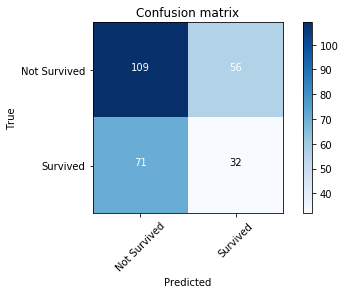

In [131]:
cnf_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test_std))
target_names = ['Not Survived', 'Survived']

plot_confusion_matrix(cnf_matrix, classes=target_names) #注意：targeet_names必須和confusion_matrix中labels的順序一致
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()